In [197]:
PATH_TO_DATA = 'train-balanced-sarcasm.csv'

In [199]:
import os
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from matplotlib import pyplot as plt

In [201]:
train_df = pd.read_csv(PATH_TO_DATA)

In [202]:
train_df

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...
...,...,...,...,...,...,...,...,...,...,...
1010821,1,I'm sure that Iran and N. Korea have the techn...,TwarkMain,reddit.com,2,2,0,2009-04,2009-04-25 00:47:52,"No one is calling this an engineered pathogen,..."
1010822,1,"whatever you do, don't vote green!",BCHarvey,climate,1,1,0,2009-05,2009-05-14 22:27:40,In a move typical of their recent do-nothing a...
1010823,1,Perhaps this is an atheist conspiracy to make ...,rebelcommander,atheism,1,1,0,2009-01,2009-01-11 00:22:57,Screw the Disabled--I've got to get to Church ...
1010824,1,The Slavs got their own country - it is called...,catsi,worldnews,1,1,0,2009-01,2009-01-23 21:12:49,I've always been unsettled by that. I hear a l...


In [205]:
train_df.shape

(1010826, 10)

In [207]:
train_df.describe()

,label,score,ups,downs
count,1010826.0,1.010826e+06,1.010826e+06,1.010826e+06
mean,0.5,6.885676e+00,5.498885e+00,-1.458629e-01
std,0.5,4.834288e+01,4.127297e+01,3.529689e-01
min,0.0,-5.070000e+02,-5.070000e+02,-1.000000e+00
25%,0.0,1.000000e+00,0.000000e+00,0.000000e+00
50%,0.5,2.000000e+00,1.000000e+00,0.000000e+00
75%,1.0,4.000000e+00,3.000000e+00,0.000000e+00
max,1.0,9.070000e+03,5.163000e+03,0.000000e+00


In [209]:
train_df.isna().sum()

label              0
comment           55
author             0
subreddit          0
score              0
ups                0
downs              0
date               0
created_utc        0
parent_comment     0
dtype: int64

In [211]:
train_df.head()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
0,0,NC and NH.,Trumpbart,politics,2,-1,-1,2016-10,2016-10-16 23:55:23,"Yeah, I get that argument. At this point, I'd ..."
1,0,You do know west teams play against west teams...,Shbshb906,nba,-4,-1,-1,2016-11,2016-11-01 00:24:10,The blazers and Mavericks (The wests 5 and 6 s...
2,0,"They were underdogs earlier today, but since G...",Creepeth,nfl,3,3,0,2016-09,2016-09-22 21:45:37,They're favored to win.
3,0,"This meme isn't funny none of the ""new york ni...",icebrotha,BlackPeopleTwitter,-8,-1,-1,2016-10,2016-10-18 21:03:47,deadass don't kill my buzz
4,0,I could use one of those tools.,cush2push,MaddenUltimateTeam,6,-1,-1,2016-12,2016-12-30 17:00:13,Yep can confirm I saw the tool they use for th...


In [213]:
train_df.tail()

,label,comment,author,subreddit,score,ups,downs,date,created_utc,parent_comment
1010821,1,I'm sure that Iran and N. Korea have the techn...,TwarkMain,reddit.com,2,2,0,2009-04,2009-04-25 00:47:52,"No one is calling this an engineered pathogen,..."
1010822,1,"whatever you do, don't vote green!",BCHarvey,climate,1,1,0,2009-05,2009-05-14 22:27:40,In a move typical of their recent do-nothing a...
1010823,1,Perhaps this is an atheist conspiracy to make ...,rebelcommander,atheism,1,1,0,2009-01,2009-01-11 00:22:57,Screw the Disabled--I've got to get to Church ...
1010824,1,The Slavs got their own country - it is called...,catsi,worldnews,1,1,0,2009-01,2009-01-23 21:12:49,I've always been unsettled by that. I hear a l...
1010825,1,"values, as in capitalism .. there is good mone...",frogking,politics,2,2,0,2009-01,2009-01-24 06:20:14,Why do the people who make our laws seem unabl...


In [215]:
train_df['comment'].unique()

array(['NC and NH.',
       'You do know west teams play against west teams more than east teams right?',
       "They were underdogs earlier today, but since Gronk's announcement this afternoon, the Vegas line has moved to patriots -1",
       ...,
       'Perhaps this is an atheist conspiracy to make Christians look bad?',
       'The Slavs got their own country - it is called Kosovo',
       'values, as in capitalism .. there is good money in imprisoning people ..'],
      dtype=object)

In [217]:
train_df.dropna(subset = ['comment'], inplace = True)

In [219]:
train_df['label'].value_counts()

label
0    505403
1    505368
Name: count, dtype: int64

In [221]:
train_texts, valid_texts, y_train, y_valid = \
        train_test_split(train_df['comment'], train_df['label'], random_state = 17)

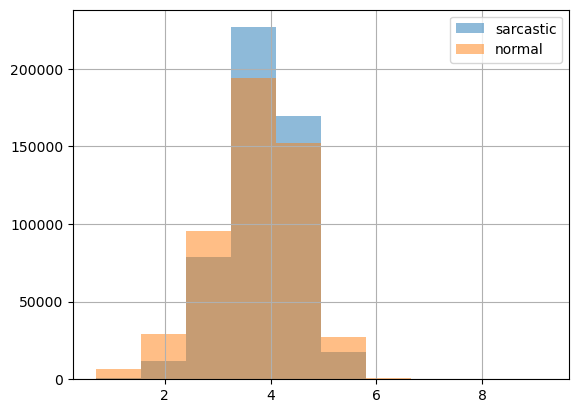

In [223]:
train_df.loc[train_df['label'] == 1, 'comment'].str.len().apply(np.log1p).hist(label = 'sarcastic', alpha = .5)
train_df.loc[train_df['label'] == 0, 'comment'].str.len().apply(np.log1p).hist(label = 'normal', alpha = .5)
plt.legend();

In [225]:
import re
import nltk
from collections import Counter
from nltk.util import ngrams
from nltk import FreqDist
nltk.download('punkt')
comments = ' '.join(train_df['comment'].dropna())
words = re.findall(r'\w+', comments.lower())
n = 5
five_grams = ngrams(words, n)
five_grams_list = [' '.join(five_gram) for five_gram in five_grams]
five_gram_counts = Counter(five_grams_list)
top_five_grams = five_gram_counts.most_common(10)
five_grams, counts = zip(*top_five_grams)

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/inflasher_b2/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [226]:
df = pd.DataFrame(top_five_grams, columns=['five_grams', 'counts'])
df

,five_grams,counts
0,fuck fuck fuck fuck fuck,5221
1,comcast comcast comcast comcast comcast,2653
2,money money money money money,1666
3,jerry jerry jerry jerry jerry,1338
4,iphone 7 iphone 7 iphone,1109
5,7 iphone 7 iphone 7,1109
6,liar liar liar liar liar,1067
7,raving raving raving raving raving,996
8,copy pasta copy pasta copy,907
9,pasta copy pasta copy pasta,907


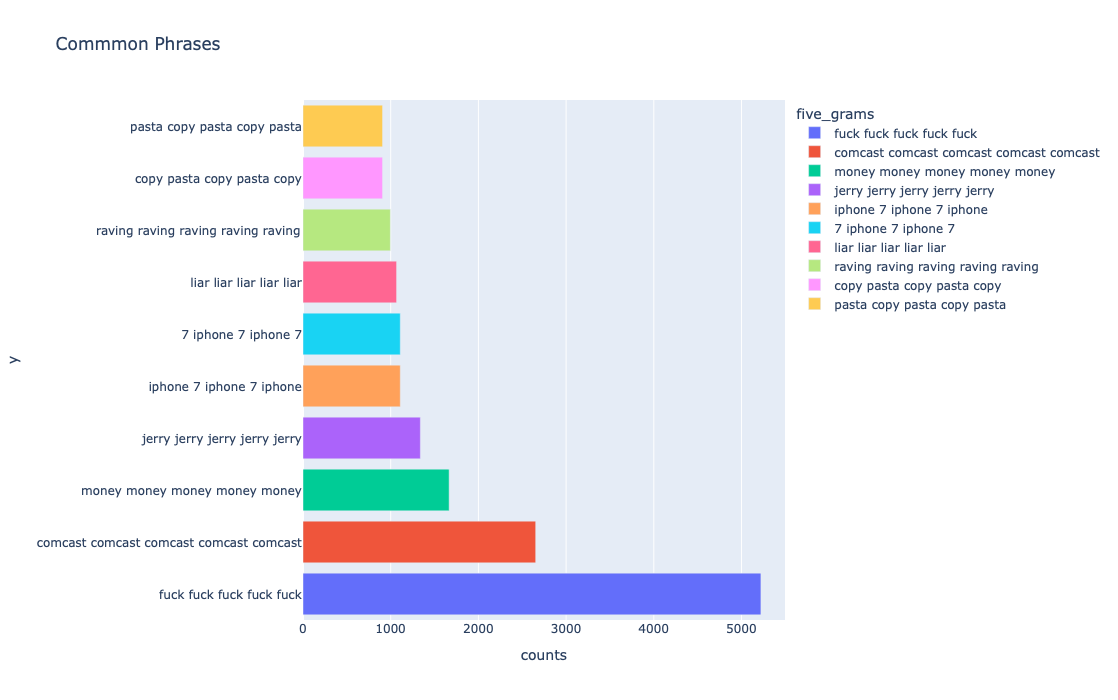

In [227]:
import plotly.express as px
fig = px.bar(df , x='counts', y=five_grams, title='Commmon Phrases', orientation = 'h',
             width=1000, height=700,color='five_grams')
fig.show()

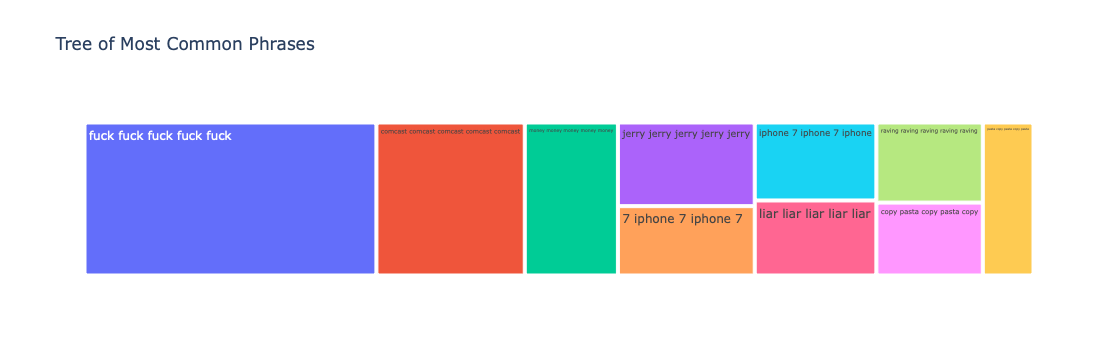

In [231]:
fig = px.treemap(df, path=['five_grams'], values='counts',title='Tree of Most Common Phrases')
fig.show()

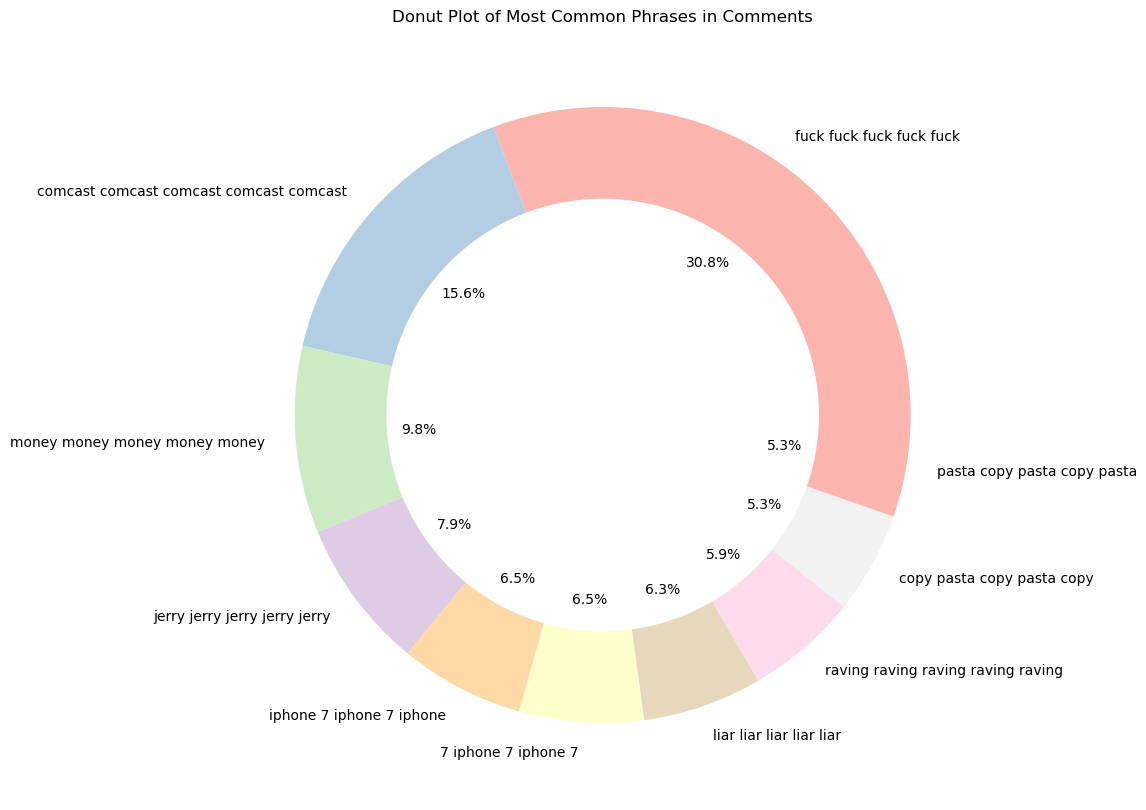

In [233]:
plt.figure(figsize=(16,10))
my_circle = plt.Circle((0, 0), 0.7, color='white')
plt.pie(counts, labels=five_grams, colors=sns.color_palette("Pastel1", len(five_grams)), autopct='%1.1f%%')
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('Donut Plot of Most Common Phrases in Comments')
plt.show()

In [235]:
from wordcloud import WordCloud, STOPWORDS

In [237]:

wordcloud = WordCloud(
    background_color = 'black', 
    stopwords = STOPWORDS, 
    max_words = 200, 
    max_font_size = 100, 
    random_state = 17, 
    width = 800, 
    height = 400)

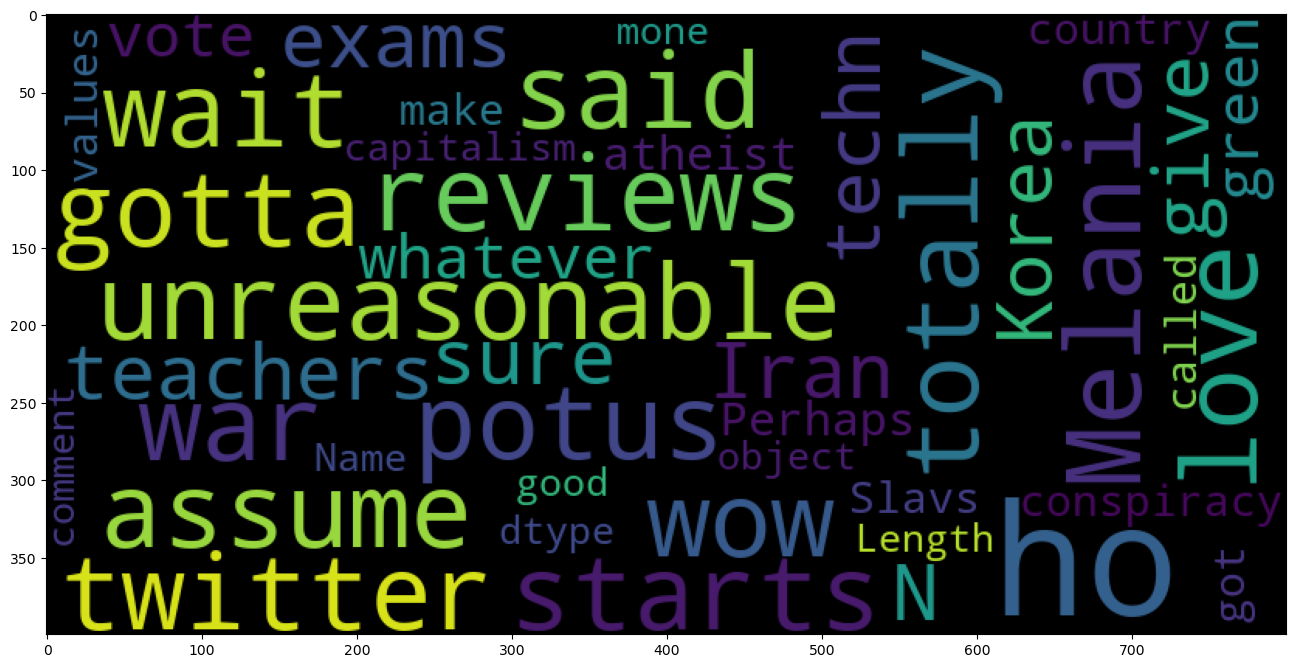

In [239]:
plt.figure(figsize = (16, 12))
wordcloud.generate(str(train_df.loc[train_df['label'] == 1, 'comment']))
plt.imshow(wordcloud);

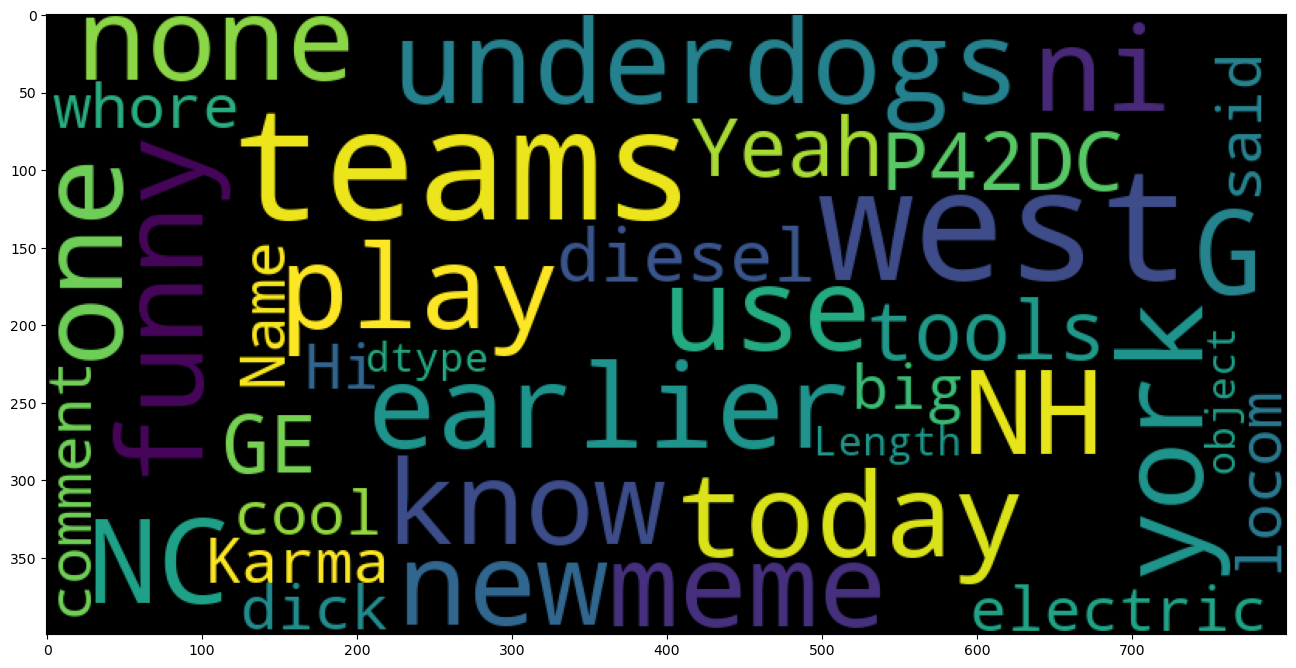

In [241]:
plt.figure(figsize = (16, 12))
wordcloud.generate(str(train_df.loc[train_df['label'] == 0, 'comment']))
plt.imshow(wordcloud);

In [243]:
sub_df = train_df.groupby('subreddit')['label'].agg(['size', 'mean', 'sum'])
top_subreddits = sub_df.sort_values(by='sum', ascending=False).head(10)

In [245]:
sub_df[sub_df['size'] > 1000].sort_values(by = 'mean', ascending = False).head(10)

,size,mean,sum
subreddit,,,
creepyPMs,5466,0.784303,4287
MensRights,3355,0.680775,2284
ShitRedditSays,1284,0.661994,850
worldnews,26375,0.642540,16947
Libertarian,2562,0.640125,1640
atheism,7377,0.639555,4718
Conservative,1881,0.639553,1203
TwoXChromosomes,1560,0.632692,987
fatlogic,2356,0.623090,1468


In [247]:
sub_df = train_df.groupby('author')['label'].agg(['size', 'mean', 'sum'])
top_authors = sub_df[sub_df['size'] > 300].sort_values(by='mean', ascending=False).head(10)

In [249]:
sub_df = train_df[train_df['score'] >= 0].groupby('score')['label'].agg(['size', 'mean', 'sum'])
result = sub_df[sub_df['size'] > 300].sort_values(by='mean', ascending=False).head(10)

In [251]:
sub_df = train_df[train_df['score'] < 0 ].groupby('score')['label'].agg(['size', 'mean', 'sum'])
sub_df[sub_df['size'] > 300].sort_values(by = 'mean', ascending = False).head(10)

,size,mean,sum
score,,,
-14,537,0.698324,375
-8,1852,0.696004,1289
-9,1503,0.691284,1039
-6,3088,0.688795,2127
-12,776,0.684278,531
-5,4134,0.678520,2805
-3,6736,0.676069,4554
-2,11924,0.675948,8060
-4,5436,0.673473,3661


In [253]:
tf_idf = TfidfVectorizer(ngram_range = (1, 2), max_features = 50000, min_df = 2)
logit = LogisticRegression(C = 1, n_jobs = 4, solver = 'lbfgs', random_state = 17, verbose = 1)
tfidf_logit_pipeline = Pipeline([('tf_idf', tf_idf), ('logit', logit)])

In [255]:
%%time
tfidf_logit_pipeline.fit(train_texts, y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        50001     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  1.75475D-03


 This problem is unconstrained.



At iterate   50    f=  5.46377D-01    |proj g|=  4.22580D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
50001     87    104      1     0     0   7.497D-05   5.371D-01
  F =  0.53711600554808547     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
CPU times: user 9.92 s, sys: 366 ms, total: 10.3 s
Wall time: 15.4 s


Pipeline(steps=[('tf_idf',
                 TfidfVectorizer(max_features=50000, min_df=2,
                                 ngram_range=(1, 2))),
                ('logit',
                 LogisticRegression(C=1, n_jobs=4, random_state=17,
                                    verbose=1))])

In [256]:
%%time
valid_pred = tfidf_logit_pipeline.predict(valid_texts)

CPU times: user 2.1 s, sys: 87.1 ms, total: 2.19 s
Wall time: 2.21 s


In [144]:
accuracy_score(y_valid, valid_pred)

0.7183934655886788

In [145]:
def plot_confusion_matrix(actual, predicted, classes, 
                          normalize = False, title = 'Confusion matrix', 
                          figsize = (7,7), cmap = plt.cm.Blues, path_to_save_fig = None): 
    import itertools
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(actual, predicted).T
    if normalize:
        cm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]
    plt.figure(figsize = figsize)
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 90)
    plt.yticks(tick_marks, classes)
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j,i, format(cm[i,j], fmt),
                 horizontalalignment = "center",
                 color = "white" if cm[i,j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('predicted label')
    plt.xlabel('true label')
    if path_to_save_fig:
        plt.savefig(path_to_save_fig , dpi = 300, bbox_inches = 'tight')

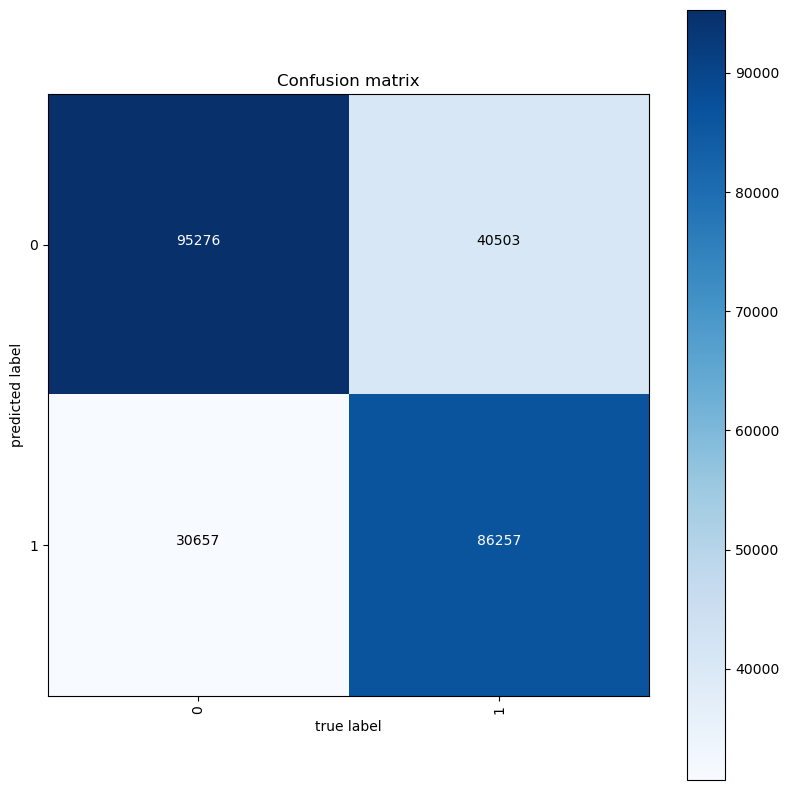

In [146]:
plot_confusion_matrix(y_valid, valid_pred, 
                     tfidf_logit_pipeline.named_steps['logit'].classes_, figsize = (8,8))

In [147]:
import numpy as np
tfidf_vectorizer = tfidf_logit_pipeline.named_steps['tf_idf']
feature_names = np.array(tfidf_vectorizer.get_feature_names_out())
logit_model = tfidf_logit_pipeline.named_steps['logit']
coefficients = logit_model.coef_.flatten()
feature_importance = list(zip(feature_names, coefficients))
sorted_features = sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)
for feature, importance in sorted_features[:10]:
    print(f"{feature}: {importance}")

yes because: 10.773694722430104
obviously: 9.103308344738021
clearly: 7.939199887275504
totally: 7.92148679414087
yeah because: 7.459346996831283
because: 6.537064443002315
but thought: 5.936703249141837
gee: 5.745541263033786
good thing: 5.602008058512037
right because: 5.580756460077908


In [148]:
subreddits = train_df['subreddit']
train_subreddits, valid_subreddits = train_test_split(subreddits, random_state = 17)

In [149]:
tf_idf_texts = TfidfVectorizer(ngram_range = (1, 2), max_features = 50000, min_df = 2)
tf_idf_subreddits = TfidfVectorizer(ngram_range = (1, 1))

In [150]:
X_train_texts = tf_idf_texts.fit_transform(train_texts)
X_valid_texts = tf_idf_texts.transform(valid_texts)

In [151]:
X_train_texts.shape, X_valid_texts.shape

((758078, 50000), (252693, 50000))

In [152]:
%%time
X_train_subreddits = tf_idf_subreddits.fit_transform(train_subreddits)
X_valid_subreddits = tf_idf_subreddits.transform(valid_subreddits)

CPU times: user 1.06 s, sys: 24.9 ms, total: 1.09 s
Wall time: 1.09 s


In [153]:
X_train_subreddits.shape, X_valid_subreddits.shape

((758078, 13238), (252693, 13238))

In [154]:
from scipy.sparse import hstack
X_train = hstack([X_train_texts, X_train_subreddits])
X_valid = hstack([X_valid_texts, X_valid_subreddits])

In [155]:
X_train.shape, X_valid.shape

((758078, 63238), (252693, 63238))

In [158]:
X_train

<758078x63238 sparse matrix of type '<class 'numpy.float64'>'
	with 11173067 stored elements in Compressed Sparse Row format>

In [194]:
logit.fit(X_train, y_train)

[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =        63239     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.93147D-01    |proj g|=  6.36610D-03


 This problem is unconstrained.



At iterate   50    f=  5.49674D-01    |proj g|=  9.45623D-04

At iterate  100    f=  5.30830D-01    |proj g|=  1.58548D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
63239    100    111      1     0     0   1.585D-03   5.308D-01
  F =  0.53083001489464965     

STOP: TOTAL NO. of ITERATIONS REACHED LIMIT                 


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1, n_jobs=4, random_state=17, verbose=1)

In [164]:
%%time
valid_pred = logit.predict(X_valid)

CPU times: user 5.48 ms, sys: 1.08 ms, total: 6.55 ms
Wall time: 5.68 ms


In [168]:
accuracy_score(y_valid, valid_pred)

0.7220500765751326